In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [50]:
brca = pd.read_csv('TCGA-BRCA.gistic.tsv', sep='\t').transpose()
ovra = pd.read_csv('TCGA-OV.gistic.tsv', sep='\t').transpose()
df = pd.concat([brca,ovra[1:]])
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df['BRCA'] = list(map(int,list("1" * (len(brca)-1)))) + list(map(int, list("0" * (len(ovra)-1))))
df.to_csv('dataset_combined.csv')

In [51]:
df.head()

TCGA-BRCA.gistic.tsvGene Symbol,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7,BRCA
TCGA-3C-AAAU-01,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,...,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,1
TCGA-3C-AALI-01,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,...,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,1
TCGA-3C-AALJ-01,-0.33,-0.33,-0.33,-0.33,-0.33,-0.33,-0.33,-0.33,-0.33,-0.33,...,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,1
TCGA-3C-AALK-01,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,...,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,1
TCGA-4H-AAAK-01,0,0,0,0,0,0,0,0,0,0,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,1


In [52]:
df['BRCA'].value_counts()

1    1080
0     579
Name: BRCA, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
labels = np.array(df.pop('BRCA'))

train, test, train_labels, test_labels = train_test_split(df, labels, stratify = labels, test_size = 0.3)



In [54]:
features = list(train.columns)

In [55]:
train.shape

(1161, 24776)

In [56]:
test.shape

(498, 24776)

In [58]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators = 100, random_state = 42,max_features = 'sqrt', n_jobs = -1, verbose = 1)

model.fit(train, train_labels)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [59]:

n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 94
Average maximum depth 13


In [ ]:
## Evaluation methods pulled from https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/Random%20Forest%20Tutorial.ipynb

In [106]:
## Evaluation

In [96]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [97]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [78]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
20613,R3HDM4,0.010960
19256,MIR4723,0.009827
20702,MFSD12,0.009035
19249,PPY2,0.008954
19267,KIAA0100,0.008686
20695,NFIC,0.008407
19292,NUFIP2,0.007844
19239,KSR1,0.007813
20659,AP3D1,0.007409
19245,SNORA70|ENSG00000202389.1,0.007124


In [79]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.96 Train: 1.0
Precision Baseline: 0.65 Test: 0.95 Train: 1.0
Roc Baseline: 0.5 Test: 0.98 Train: 1.0


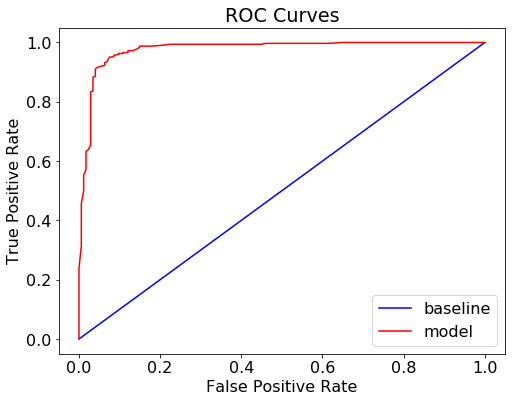

In [102]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


Confusion matrix, without normalization
[[159  15]
 [ 14 310]]


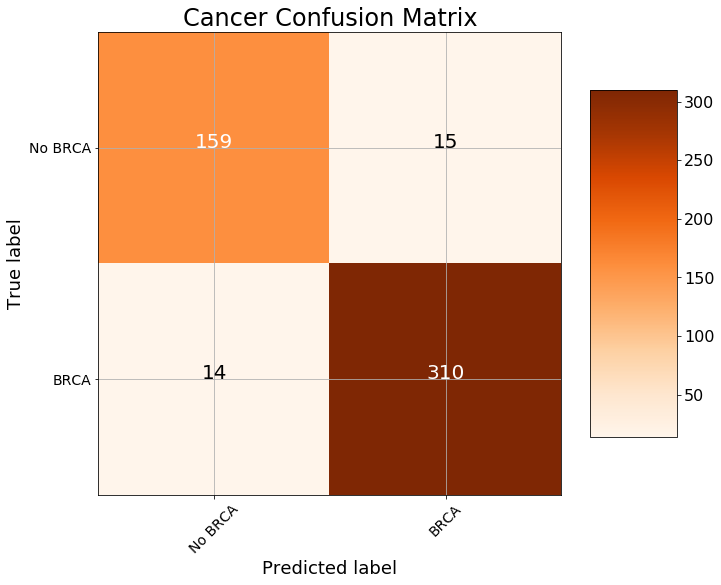

In [104]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['No BRCA', 'BRCA'],
                      title = 'Cancer Confusion Matrix')